In [65]:
# imports
import sympy as sp
from sympy import Matrix, MatrixSymbol
sp.init_printing()
import matplotlib.pyplot as plt
import numpy as np
import mpmath

In [66]:
# constants
Lc=sp.Symbol('L_c')
Lc=1 #CHANGEABLE
Vc=sp.Symbol('V_c')
Vc=1 #CHANGEABLE
h=sp.Symbol('\hbar')
h=1 #CHANGEABLE

In [67]:
# dimensional parameters
n=sp.Symbol('n')
n=1023 #CHANGEABLE
A=sp.Symbol('A')
A=-4 #CHANGEABLE
B=sp.Symbol('B')
B=4 #CHANGEABLE
S=sp.Symbol('S')
S=(B-A)/(n+1)
Omega=sp.Symbol('\Omega')
Omega=2 #CHANGEABLE
M=sp.Symbol('M')
M=0.5 #CHANGEABLE
E0=sp.Symbol('\varepsilon_0')
E0=h*Omega/2
Epsilon=sp.Symbol('\varepsilon')
Epsilon=E0*(1+2*np.linspace(0,9,10)) #\varepsilon=(1+2j)*\varepsilon_0 FOR j=0,1,...

In [68]:
# non-dimensional parameters
a=sp.Symbol('a')
a=A/Lc
b=sp.Symbol('b')
b=B/Lc
s=sp.Symbol('s')
s=S/Lc

In [69]:
# dimensional grid
Xi=sp.Symbol('X_i')
Xi=np.linspace(A,B,n)
# non-dimensional grid
xi=sp.Symbol('x_i')
xi=np.linspace(a,b,n)

In [70]:
# dimensional Quantum Harmonic Oscillator potential
V=sp.Function('V')
def V(X,Omega,M):
    return (M*Omega*Omega*X*X)/2
Vi=sp.Symbol('V_i')
Vi=V(Xi,Omega,M)
# non-dimensional Quantum Harmonic Oscillator potential
v=sp.Function('v')
def v(V):
    return V/Vc
vi=sp.Symbol('v_i')
vi=v(V(Xi,Omega,M))

In [71]:
# auxiliary variables
alpha=sp.Symbol('\alpha')
alpha=(2*M*Vc*Lc*Lc)/(h*h)
vit=sp.Symbol('\widetilde{v_i}')
vit=s*s*alpha*vi

In [72]:
# hamiltonian operator
H=sp.MatrixSymbol('H',n,n)
H= -1*np.eye(n,n,k=-1) + (2+vit)*np.eye(n,n) + -1*np.eye(n,n,k=1)

In [73]:
# eigenvalues and eigenvectors
eigval=np.linalg.eigh(H)[0]
eigvec=np.linalg.eigh(H)[1]
(eigval)[1]/(s*s*alpha)

In [74]:
# transpose eigvec to make an easier to use array
Psi=eigvec.T

Text(0, 0.5, '$\\psi_n(x)$')

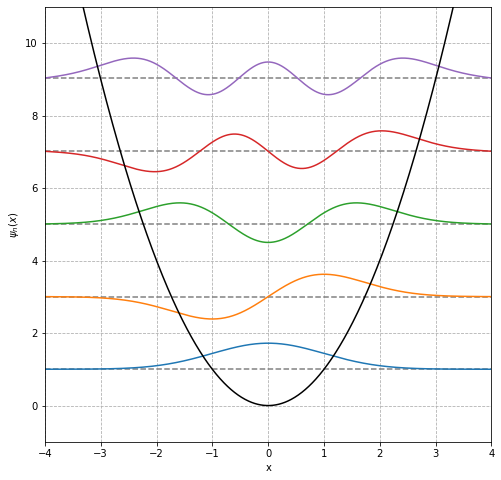

In [75]:
# graph of QHO eigenstates
fig,ax=plt.subplots(figsize=(8,8))
i=0
for i in range(0,5):
    if(i%4==0 or i%4==1): plt.plot(Xi,Psi[i]*np.sqrt(np.sqrt(n*np.sqrt(np.sqrt(n*np.sqrt(n)))))+eigval[i]/(s*s*alpha))
    else: plt.plot(Xi,-Psi[i]*np.sqrt(np.sqrt(n*np.sqrt(np.sqrt(n*np.sqrt(n)))))+eigval[i]/(s*s*alpha))
    plt.hlines(eigval[i]/(s*s*alpha),A,B,color='grey',ls='--')
plt.plot(Xi,Vi,color='black')
plt.xlim(A,B)
plt.ylim(-1,11)
plt.grid(ls='--')
ax.set_xlabel('x')
ax.set_ylabel('$\psi_n(x)$')

Text(0, 0.5, '$\\psi^2_n(x)$')

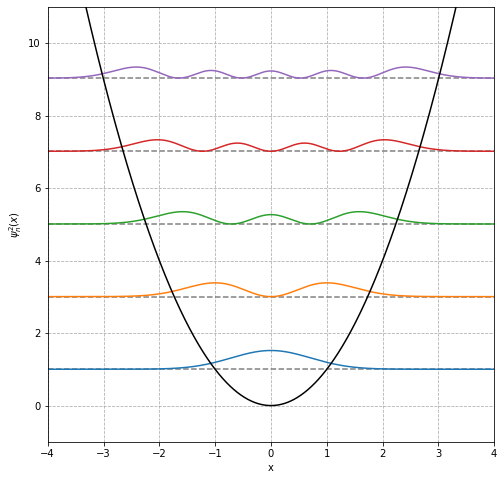

In [76]:
# graph of QHO eigenstates probability densities
fig,ax=plt.subplots(figsize=(8,8))
i=0
for i in range(0,7):
    plt.plot(Xi,(Psi[i]*np.sqrt(np.sqrt(n*np.sqrt(np.sqrt(n*np.sqrt(n))))))**2+eigval[i]/(s*s*alpha))
    plt.hlines(eigval[i]/(s*s*alpha),A,B,color='grey',ls='--')
plt.plot(Xi,vi,color='black')
plt.xlim(A,B)
plt.ylim(-1,11)
plt.grid(ls='--')
ax.set_xlabel('x')
ax.set_ylabel('$\psi^2_n(x)$')